<a href="https://colab.research.google.com/github/cxbxmxcx/TensorFlow_Certification/blob/master/TF_certification_raw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 56

np.random.seed(RANDOM_SEED)

Environment Data

In [0]:
X = np.array([[1], [2], [3]])
y = np.array([ [0], [1], [1]])

Activation Functions

In [0]:
def sigmoid(x):
  """
  Computes the sigmoid function sigm(input) = 1/(1+exp(-input))
  """
  return 1 / (1 + np.exp(-x))

def sigmoid_(y):
  """
  Computes the derivative of sigmoid funtion. sigmoid(y) * (1.0 - sigmoid(y)). 
  The way we implemented this requires that the input y is already sigmoided
  """
  return y * (1-y)

Multiply and Sum inputs*weights

In [0]:
def dense(inputs, weights):
    """A simple dense layer."""
    return np.matmul(inputs, weights)

Initialization

In [0]:
input_size = 1
hidden_size = 3
output_size = 1

def initialize_weights():
    # weights for hidden layer, shape: 1x3
    w1 = np.random.uniform(size=(input_size, hidden_size))
    # weights for output layer, shape: 3x1
    w2 = np.random.uniform(size=(hidden_size, output_size))
    return w1, w2
    
w1, w2 = initialize_weights()

Forward Pass

In [0]:
def forward_pass(X):
    # Step 1: Calculate weighted average of inputs (output shape: 1x3)
    net_hidden = dense(X, w1)
    
    # Step 2: Calculate the result of the sigmoid activation function (shape: 1x3)
    act_hidden = sigmoid(net_hidden)
    
    # Step 3: Calculate output of neural network (output shape: 4x1)
    y_hat = dense(act_hidden, w2)
    
    return act_hidden, y_hat

Loss Function

In [0]:
def mse(y_hat, y):
    residual = y_hat - y
    error = np.mean(0.5 * (residual ** 2))
    return residual, error

Backpropagation

In [0]:
def backward_pass(X, y_hat, act_hidden):
    # Step 1: Calculate error
    residual, error = mse(y_hat, y)
    
    # Step 2: calculate gradient wrt w2
    N = X.shape[0]
    dL_dy = 1.0 / N * residual  # shape (4, 1)
    dy_dw2 = act_hidden  # shape (4, 3)
    dL_dw2 = np.matmul(dL_dy.T, dy_dw2)  # shape (1, 3)
    
    # According to the math, `dL_dw2` is a row-vector, however, `w2` is a column-vector.
    # To prevent erroneous numpy broadcasting during the gradient update, we must make
    # sure that `dL_dw2` is also a column-vector.
    dL_dw2 = dL_dw2.T
    
    # Step 3: calculate gradient wrt w1
    dL_dw1 = 1.0 / N * np.matmul(X.T, np.matmul(residual, w2.T) * sigmoid_(act_hidden))
    
    return dL_dw2, dL_dw1, error

Optimization

Epoch 0> Training error: 0.097586
Epoch 200> Training error: 0.080918
Epoch 400> Training error: 0.080034
Epoch 600> Training error: 0.079753
Epoch 800> Training error: 0.079648
Epoch 1000> Training error: 0.079604
Epoch 1200> Training error: 0.079585
Epoch 1400> Training error: 0.079576
Epoch 1600> Training error: 0.079571
Epoch 1800> Training error: 0.079569
Epoch 2000> Training error: 0.079568
Epoch 2200> Training error: 0.079567
Epoch 2400> Training error: 0.079567
Epoch 2600> Training error: 0.079567
Epoch 2800> Training error: 0.079567
Epoch 3000> Training error: 0.079567
Epoch 3200> Training error: 0.079567
Epoch 3400> Training error: 0.079567
Epoch 3600> Training error: 0.079567
Epoch 3800> Training error: 0.079567
Epoch 4000> Training error: 0.079567
Epoch 4200> Training error: 0.079567
Epoch 4400> Training error: 0.079567
Epoch 4600> Training error: 0.079567
Epoch 4800> Training error: 0.079567
Epoch 5000> Training error: 0.079567
Epoch 5200> Training error: 0.079567
Epoch 54

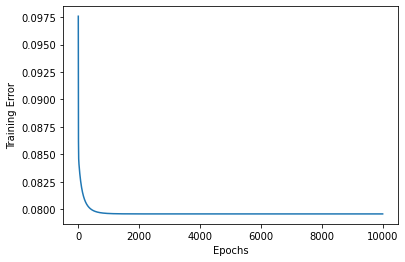

In [9]:
n_epochs = 10000
learning_rate = 0.1
training_errors = []

# re-initialize the weights to be sure we start fresh
w1, w2 = initialize_weights()

for epoch in range(n_epochs):
 
    # Step 1: forward pass
    act_hidden, y_hat = forward_pass(X)
    
    # Step 2: backward pass
    dw2, dw1, error = backward_pass(X, y_hat, act_hidden)
    
    # Step 3: apply gradients scaled by learning rate
    w2 = w2 - learning_rate * dw2
    w1 = w1 - learning_rate * dw1
    
    # Step 4: some book-keeping and print-out
    if epoch % 200 == 0:
        print('Epoch %d> Training error: %f' % (epoch, error))
    training_errors.append([epoch, error])

# Plot training error progression over time
training_errors = np.asarray(training_errors)
plt.plot(training_errors[:, 0], training_errors[:, 1]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

Predict

In [10]:
print(forward_pass([3]))

(array([0.90971026, 0.90971026, 0.90971074]), array([0.79917925]))
